In [1]:
from keras.layers import Input, Dense, Conv2D, LSTM , Flatten, Reshape
from keras.models import Model

from keras.datasets import mnist, cifar100
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data

In [2]:
(x_train, _), (x_test, _) = cifar100.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# Model

In [3]:
# size of encoded representations
encoding_dim = 64

# this is our input placeholder
input_img = Input(shape=(32,32,3))

# encoded representation of the input
encoded = Conv2D(64, (3,3))(input_img)
encoded = Conv2D(32,(5,5))(encoded)
encoded = Flatten()(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# map input to its encoded representation
encoder = Model(input_img, encoded)


# input to the decoder
encoded_input = Input(shape=(encoding_dim,))

# reconstruction of the input
decoded = Dense(3072, activation='softmax')(encoded_input)


# decoder model
decoder = Model(encoded_input, decoded)

# map an input to its reconstruction
out = decoder(encoder(input_img))
out = Reshape((32,32,3))(out)

autoencoder = Model(input_img,out)

In [4]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        51232     
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1384512   
Total params: 1,437,536
Trainable params: 1,437,536
Non-trainable params: 0
_________________________________________________________________


In [5]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3072)              199680    
Total params: 199,680
Trainable params: 199,680
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
model_1 (Model)              (None, 64)                1437536   
_________________________________________________________________
model_2 (Model)              (None, 3072)              199680    
_________________________________________________________________
reshape_1 (Reshape)          (None, 32, 32, 3)         0         
Total params: 1,637,216
Trainable params: 1,637,216
Non-trainable params: 0
_________________________________________________________________


# Train

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 3.8384 - val_loss: 3.8474
Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 3.8378 - val_loss: 3.8474
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 3.8378 - val_loss: 3.8474
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 3.8378 - val_loss: 3.8474
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 3.8378 - val_loss: 3.8474
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 3.8378 - val_loss: 3.8474
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 3.8378 - val_loss: 3.8474
Epoch 8/50
50000/50000 [==============================] - 8s 167us/step - loss: 3.8378 - val_loss: 3.8474
Epoch 9/50
50000/50000 [==============================] - 8s 166us/step - loss: 3.8378 - val_loss: 3.

# Visualize

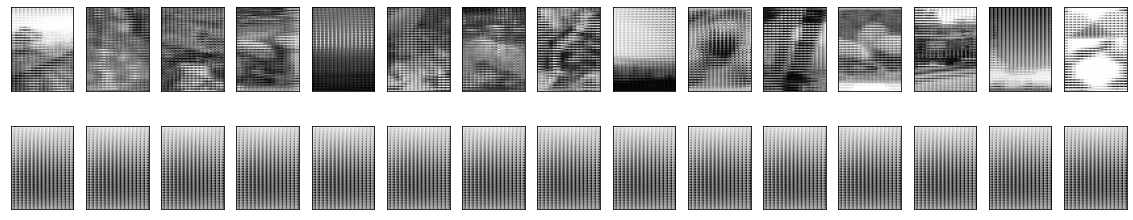

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 15 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()